In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


In [3]:
# Load data
sneaker_data = pd.read_csv('sneaker Data_trimmed.csv')

# Explore data
print(sneaker_data.head())


          SKU  SIZE                                               NAME  \
0  CZ1055-101   10W  Nike Blazer Mid 77 Vintage Habanero Red (Women's)   
1  302370-145    12                          Jordan 9 Retro Pearl Blue   
2  DC9845-100  11.5                 Nike Air Max 90 White Orange Black   
3  CN8093-006     4                      Jordan 8 Retro Pinksicle (TD)   
4  CU8591-101  8.5W  Nike Air Force 1 Low Shadow Sunset Pulse (Wome...   

                SOLD_AT  SOLD_PRICE CONDITION  SOURCE   GENDER   BRAND  \
0  2021-05-09T14:40:03Z         124    is_new  stockx    women    Nike   
1  2021-05-09T14:40:10Z         330    is_new  stockx      men  Jordan   
2  2021-05-09T14:40:18Z         120    is_new  stockx      men    Nike   
3  2021-05-09T14:40:40Z         100    is_new  stockx  toddler  Jordan   
4  2021-05-09T14:40:49Z         120    is_new  stockx    women    Nike   

     SILHOUETTE                                   COLORWAY  RETAILPRICE  \
0        Blazer                    

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
print(sneaker_data.describe())

         SOLD_PRICE   RETAILPRICE    SIZE_VALUE
count  99999.000000  99999.000000  99999.000000
mean     201.377094    150.001210     45.867199
std      203.297196     66.083508    602.542686
min        2.000000      0.000000      0.000000
25%      119.000000    110.000000      7.500000
50%      160.000000    140.000000      9.500000
75%      223.000000    180.000000     11.000000
max    13032.000000   2000.000000   9999.000000


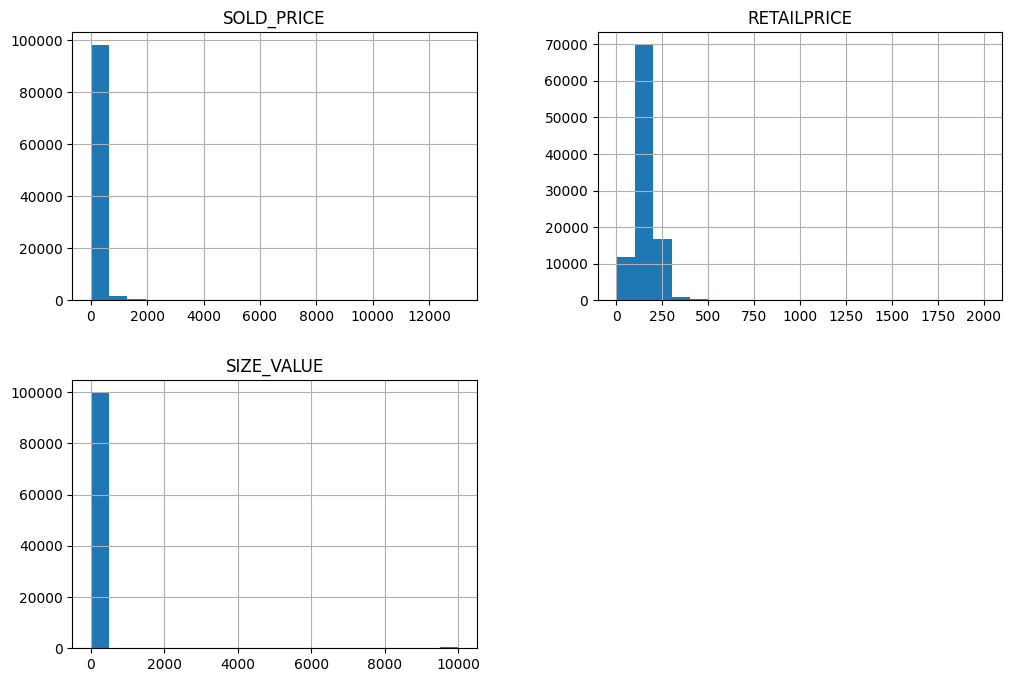

In [7]:
numeric_features = sneaker_data.select_dtypes(include=['float64', 'int64']).columns
sneaker_data[numeric_features].hist(bins=20, figsize=(12, 8))
plt.show()

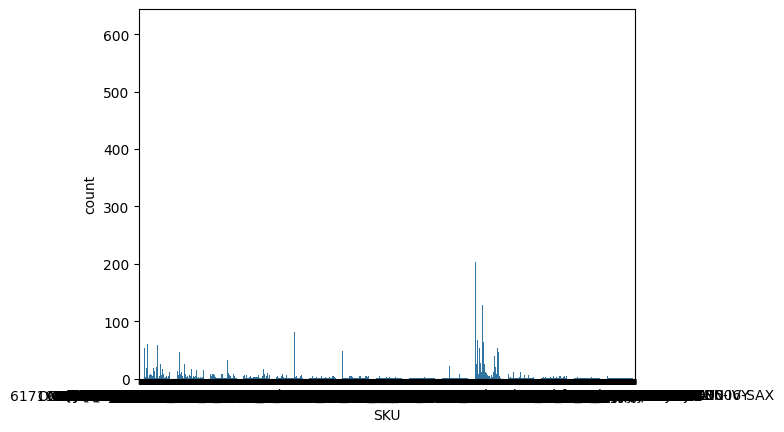

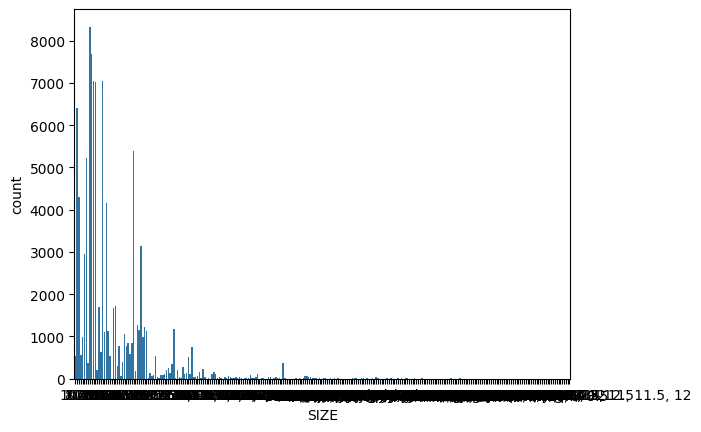

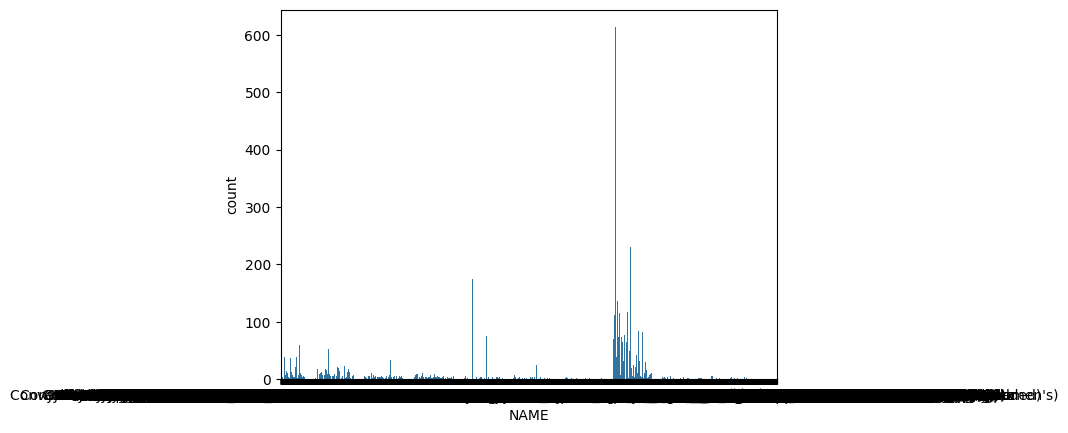

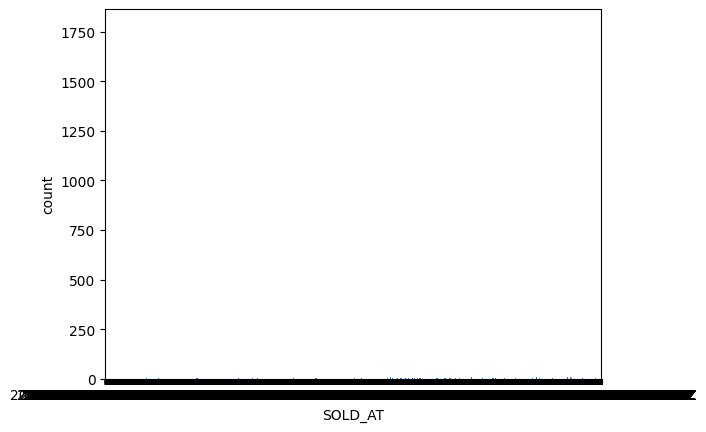

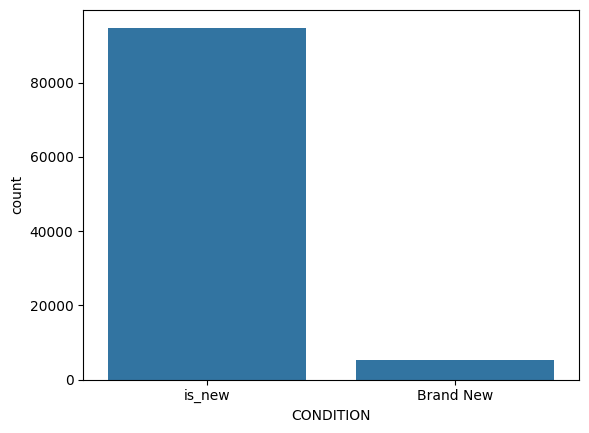

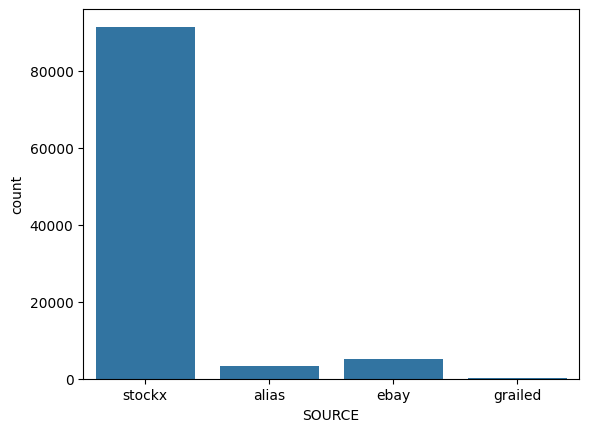

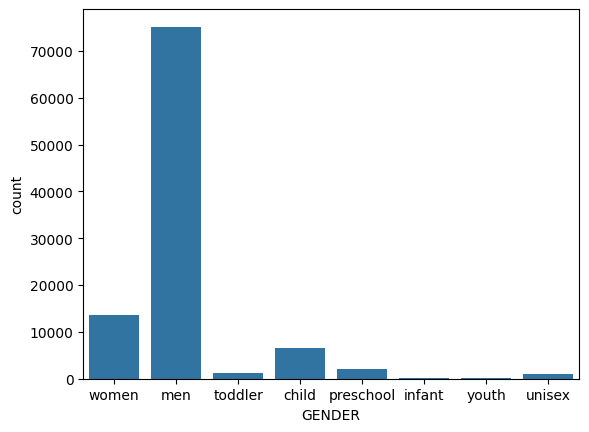

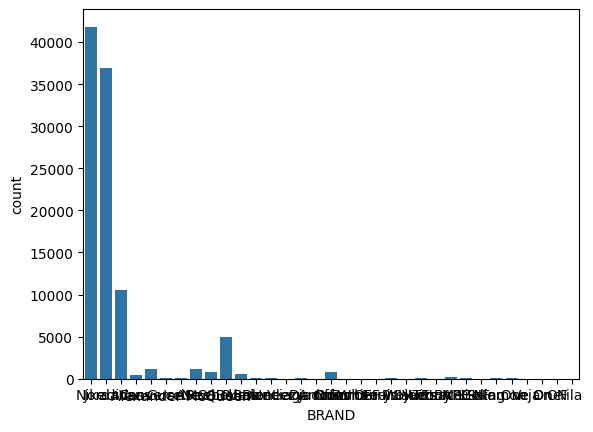

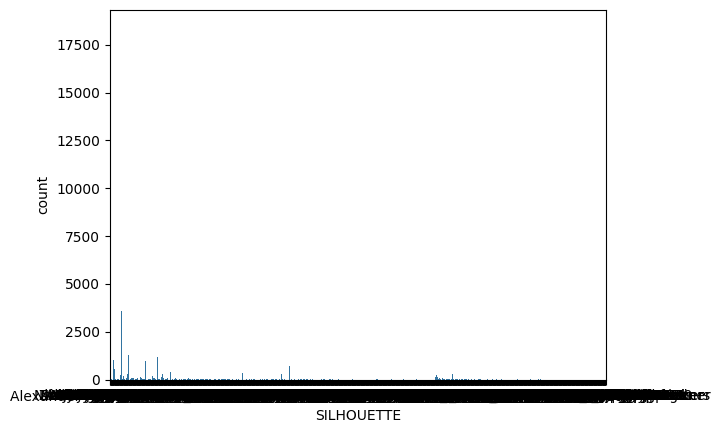

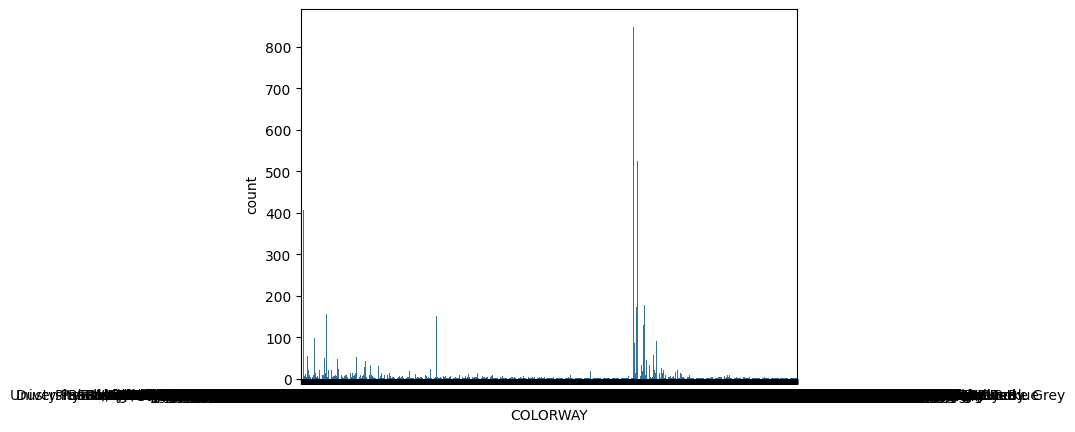

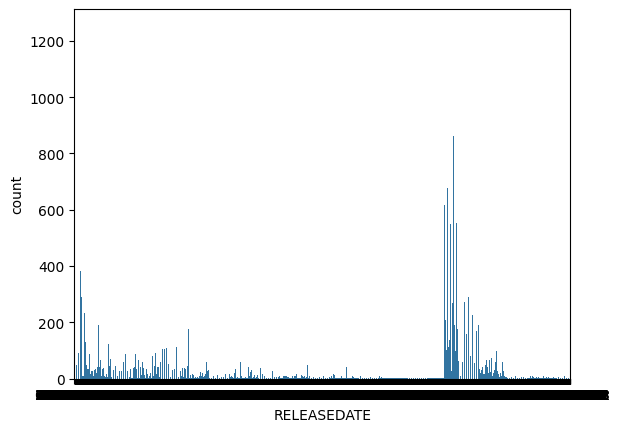

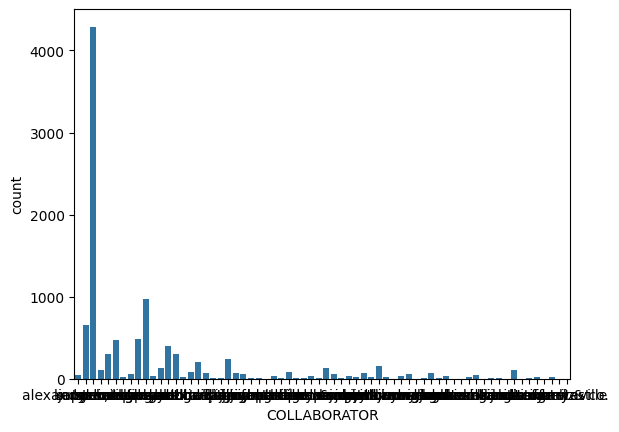

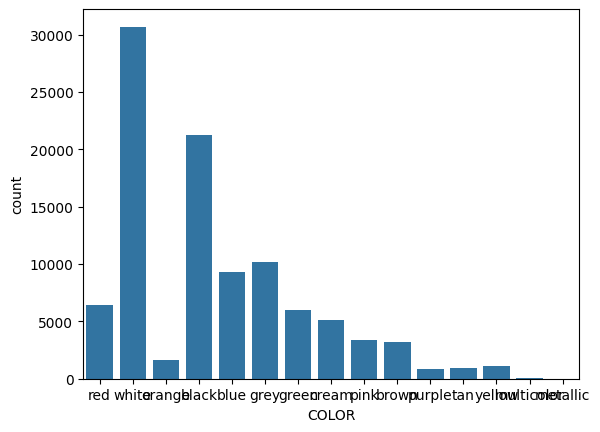

In [8]:
categorical_features = sneaker_data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    sns.countplot(x=feature, data=sneaker_data)
    plt.show()

In [ ]:
# Plot a heatmap of correlation matrix
#correlation_matrix = sneaker_data.corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.show()


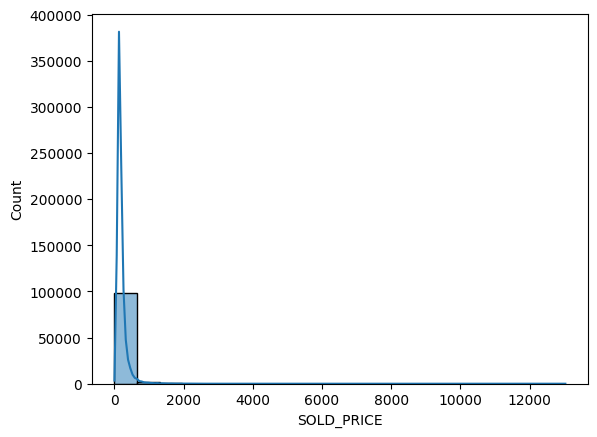

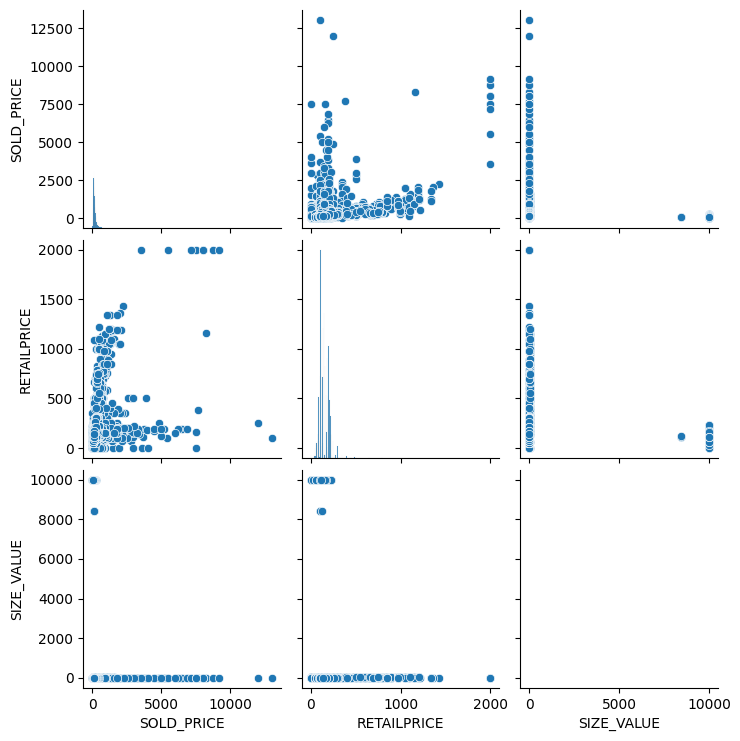

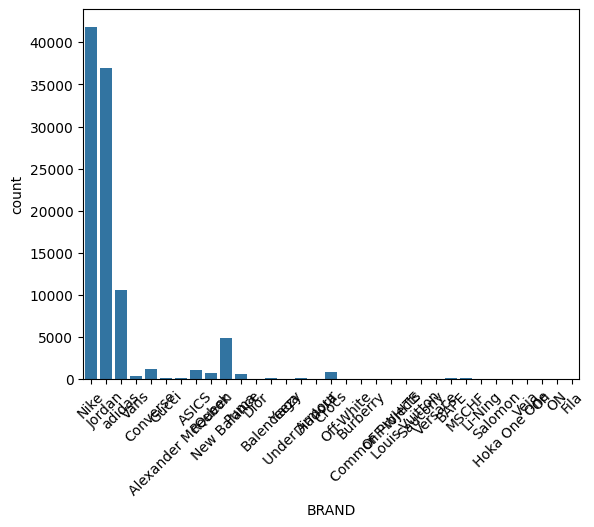

C:\Users\abhishekrajendram\AppData\Local\Temp\ipykernel_2136\1637552519.py:17: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sneaker_data['RELEASE_YEAR'] = pd.to_datetime(sneaker_data['RELEASEDATE']).dt.year


In [10]:
from sklearn.preprocessing import LabelEncoder

sns.histplot(sneaker_data['SOLD_PRICE'], bins=20, kde=True)
plt.show()

# Relationship between features
sns.pairplot(sneaker_data[['SOLD_PRICE', 'RETAILPRICE', 'SIZE_VALUE']])
plt.show()

# Distribution of categorical variables
sns.countplot(x='BRAND', data=sneaker_data)
plt.xticks(rotation=45)
plt.show()

# 4. Feature Engineering (if needed)
# Extract year from 'RELEASEDATE'
sneaker_data['RELEASE_YEAR'] = pd.to_datetime(sneaker_data['RELEASEDATE']).dt.year

# Encoding categorical variables
label_encoder = LabelEncoder()
sneaker_data['BRAND_ENCODED'] = label_encoder.fit_transform(sneaker_data['BRAND'])

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.36290368072778223


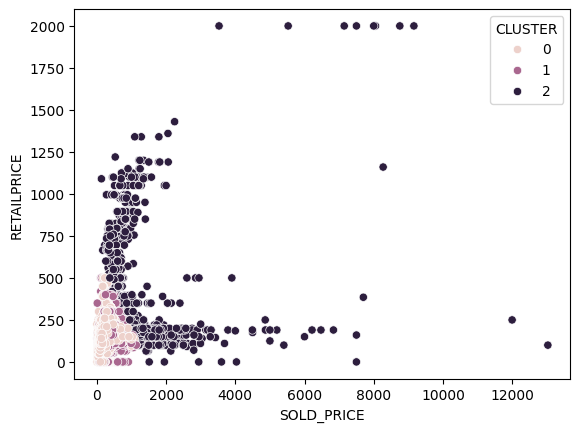

          SOLD_PRICE  RETAILPRICE  SIZE_VALUE
CLUSTER                                      
0         170.583805   145.373851   61.893402
1         222.257347   149.920342   17.592653
2        1306.910394   417.216846   17.213262


In [21]:
# Feature Scaling
#X = sklearn.preprocessing.StandardScaler().fit_transform(X)
#scaler = StandardScaler()
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
#X = StandardScaler().fit_transform(X)
scaled_features = StandardScaler().fit_transform(sneaker_data[['SOLD_PRICE', 'RETAILPRICE', 'RELEASE_YEAR']])

# Clustering Model

# Choose the number of clusters (you may need to experiment with this)
num_clusters = 3

# Train the K-means clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
sneaker_data['CLUSTER'] = kmeans.fit_predict(scaled_features)

# Evaluate the clusters
silhouette_score = metrics.silhouette_score(scaled_features, sneaker_data['CLUSTER'])
print(f'Silhouette Score: {silhouette_score}')

# Visualize the clusters
sns.scatterplot(x='SOLD_PRICE', y='RETAILPRICE', hue='CLUSTER', data=sneaker_data)
plt.show()

# Interpretation
cluster_means = sneaker_data[['SOLD_PRICE', 'RETAILPRICE', 'SIZE_VALUE','CLUSTER']].groupby('CLUSTER').mean()
print(cluster_means)

# Additional analysis based on your domain knowledge

# Save the results
sneaker_data.to_csv('clustered_sneaker_data.csv', index=False)

In [23]:
from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes
# Read data from a CSV file
file_path = 'sneaker Data_trimmed.csv'  
df = pd.read_csv(file_path)

# Drop irrelevant columns for clustering
columns_to_drop = [  "SOLD_AT", "SOLD_PRICE", "CONDITION", "SOURCE", "RETAILPRICE", "RELEASEDATE", "IS_COLLAB", "COLLABORATOR"]
df_cluster = df.drop(columns=columns_to_drop)

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
df_cluster_encoded = df_cluster.apply(label_encoder.fit_transform)

# Apply K-Modes clustering
kmode = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = kmode.fit_predict(df_cluster_encoded)

# Add the clusters to the original dataframe
df['CLUSTER'] = clusters

# Display the resulting clusters
print(df[['NAME', 'CLUSTER']])


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12410, cost: 653406.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12156, cost: 653768.0
Run 2, iteration: 2/100, moves: 1427, cost: 653768.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 11961, cost: 675303.0
Run 3, iteration: 2/100, moves: 2100, cost: 675303.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 28388, cost: 638270.0
Run 4, iteration: 2/100, moves: 2210, cost: 638270.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2252, cost: 653501.0
Best run was number 4
                                                    NAME  CLUSTER
0      Nike Blazer Mid 77 Vintage Habanero Red (Women's)        1
1                 

C:\Program Files\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
     COLOR_blue   COLOR_brown   COLOR_cream   COLOR_green    COLOR_grey  \
0  1.575858e-01  5.360556e-02  8.626960e-02  1.017812e-01 -1.544598e-14   
1  7.965850e-15  2.213507e-15 -4.593548e-15  1.360023e-15  5.453971e-15   
2  1.026956e-15  8.951173e-16  6.245005e-17 -1.540434e-15  1.000000e+00   

   COLOR_metallic  COLOR_multicolor  COLOR_orange    COLOR_pink  COLOR_purple  \
0    1.014936e-04      1.150261e-03  2.711572e-02  5.695485e-02  1.387080e-02   
1    4.824700e-18     -5.160802e-17  8.985868e-16 -3.039236e-15  4.874573e-16   
2    2.039655e-18     -4.119968e-18 -4.926615e-16  5.481726e-16 -2.567391e-16   

      COLOR_red     COLOR_tan   COLOR_white  COLOR_yellow  
0  1.081246e-01  1.507181e-02 -4.379830e-14  1.919922e-02  
1 -4.635181e-15 -5.915407e-16  1.000000e+00 -9.697104e-16  
2  1.706968e-15  2.151057e-16 -4.107825e-15 -6.245005e-17  


C:\Users\abhishekrajendram\AppData\Local\Temp\ipykernel_2136\3277878764.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['COLOR'], df['Cluster'], cmap='viridis')


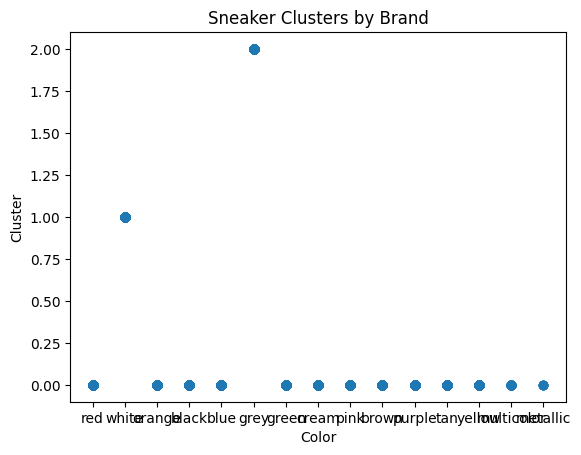

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Assuming you have the data in a DataFrame named 'sneaker_data'
# You can read the data from a CSV file or use any other method to load the data into a DataFrame

# Example:
# sneaker_data = pd.read_csv('your_data_file.csv')
file_path = 'sneaker Data_trimmed.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)
# Select relevant features for clustering
selected_features = df[['COLOR']]

# Perform one-hot encoding on the 'BRAND' feature
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(selected_features)

# Choose the number of clusters (you may need to experiment with this)
num_clusters = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(encoded_features)

# Print the cluster centers
print("Cluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=encoder.get_feature_names_out(['COLOR'])))

# Visualize the clusters
plt.scatter(df['COLOR'], df['Cluster'], cmap='viridis')
plt.title('Sneaker Clusters by Brand')
plt.xlabel('Color')
plt.ylabel('Cluster')
plt.show()
